In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
import glob

### Herbivores and carnivores in a single lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Simulated 50 years
- 20 carnivores with age 5 and weight 20 added
- Simulated 250 years
- Default parameters for animals and lowland
- Simulations performed with five different seeds
- For each simulation, herbivore and carnivore count for each year is written to csv file

In [4]:
mhcd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_ref/mono_hoh_*.csv')]
tc = mhcd[0][:, 0]   # time axis

# herbivore and carnivore counts
hc = np.zeros((len(tc), len(mhcd)))  
cc = np.zeros((len(tc), len(mhcd)))  
for k, cts in enumerate(mhcd):
    hc[:, k] = cts[:, 1]
    cc[:, k] = cts[:, 2]

#### Plot animal counts

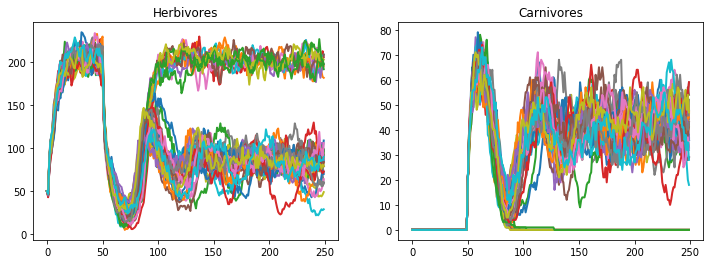

In [5]:
plt.subplot(1, 2, 1);
plt.plot(tc, hc, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc, cc, lw=2);
plt.title('Carnivores');

#### Late phase plots

With herbivores and carnivores in the simulation, there is not really a stationary state, but after 150 years the initial transients have died out. We look at the time after that.

In [6]:
stat_n0c = 150
tc_stat = tc[stat_n0c:]
hc_stat = hc[stat_n0c:, :]
cc_stat = cc[stat_n0c:, :]

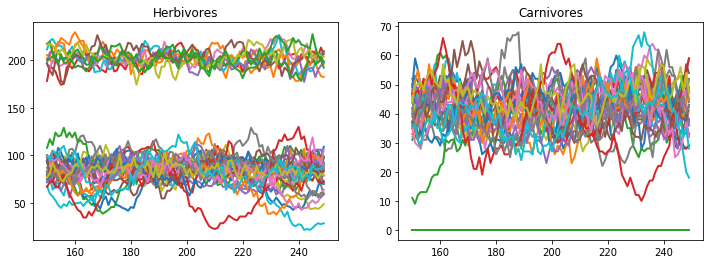

In [7]:
plt.subplot(1, 2, 1);
plt.plot(tc_stat, hc_stat, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc_stat, cc_stat, lw=2);
plt.title('Carnivores');

#### Mean animal numbers in late phase

In [8]:
scix = cc_stat[-1, :] > 5

##### Counts for cases with surviving carnivores

In [9]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, scix].mean(), hc_stat[:, scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, scix].mean(), cc_stat[:, scix].std()))

mean(num herb) =  83.7 ± 14.9
mean(num carn) =  41.9 ±  7.9


##### Counts for cases with carnivores died out

In [10]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat[:, ~scix].mean(), hc_stat[:, ~scix].std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat[:, ~scix].mean(), cc_stat[:, ~scix].std()))

mean(num herb) = 201.7 ±  9.0
mean(num carn) =   0.0 ±  0.0


##### Proportion of cases with and without surviving carnivores

In [11]:
print("Trials with surviving carnivores: {:.1f}%".format(100*sum(scix)/len(scix)))
print("Trials with died-out carnivores : {:.1f}%".format(100*sum(~scix)/len(scix)))

Trials with surviving carnivores: 75.0%
Trials with died-out carnivores : 25.0%
